<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/14_Keras_Pretrained_models_VGG16%2C_ResNet%2C_Inceptionv3%2C_MobileNetv2%2C_DenseNet%2C_MobileNASNet%2C_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VGG16**

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
!gdown --id 1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
!unzip images.zip
!rm rf images/class1/.DS_Store

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
To: /content/images.zip
100% 1.46M/1.46M [00:00<00:00, 179MB/s]
Archive:  images.zip
replace images/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/.DS_Store        
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(10096362833).jpg  
  inflating: images/class1/christmas-stockings-3006869_1280.jpg  
  inflating: images/class1/download.jpg  
  inflating: images/class1/limo-safety-ftr.jpg  
  inflating: images/class1/long-haired-collie-5766447_1280.jpg  
  inflating: images

In [5]:
import cv2
from os import listdir
from os.path import isfile, join

mypath = './images/class1/'
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'spiderweb_1050x700.jpg',
 '1539714414867.jpg',
 'long-haired-collie-5766447_1280.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'download.jpg',
 'Basketball_(Ball).jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'limo-safety-ftr.jpg']

35363/35363 [==============================] - 0s 0us/step
[('n02106662', 'German_shepherd', 0.9971945), ('n02105162', 'malinois', 0.0026380345), ('n02096051', 'Airedale', 2.850489e-05)]
1/1 [==============================] - 0s 23ms/step
[('n04275548', 'spider_web', 0.9770248), ('n01773797', 'garden_spider', 0.0114205405), ('n01773549', 'barn_spider', 0.009331525)]
1/1 [==============================] - 0s 24ms/step
[('n07880968', 'burrito', 0.9861623), ('n07583066', 'guacamole', 0.009183106), ('n07697537', 'hotdog', 0.0019693829)]
1/1 [==============================] - 0s 28ms/step
[('n02106030', 'collie', 0.89366984), ('n02105855', 'Shetland_sheepdog', 0.10570214), ('n02096294', 'Australian_terrier', 9.377018e-05)]
1/1 [==============================] - 0s 24ms/step
[('n03026506', 'Christmas_stocking', 0.99994683), ('n04254777', 'sock', 3.586817e-05), ('n03775071', 'mitten', 6.344139e-06)]
1/1 [==============================] - 0s 21ms/step
[('n03930313', 'picket_fence', 0.11095252)

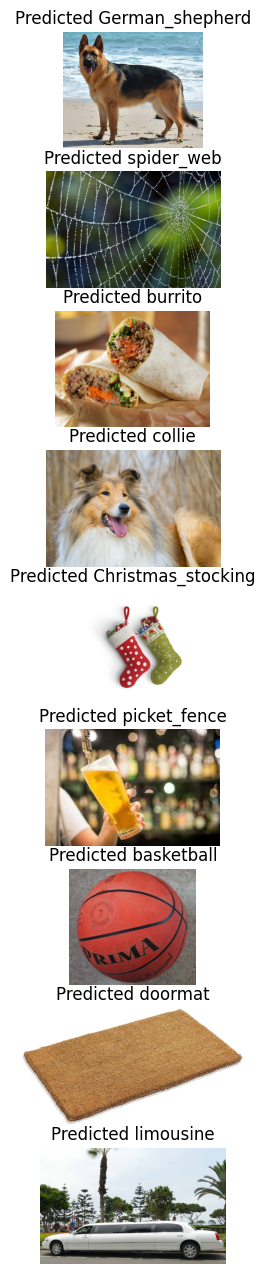

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **ResNet50**

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

1/1 [==============================] - 2s 2s/step
[('n02106662', 'German_shepherd', 0.999471), ('n02105162', 'malinois', 0.0002894656), ('n02115641', 'dingo', 7.170621e-05)]
1/1 [==============================] - 0s 25ms/step
[('n04275548', 'spider_web', 0.9995158), ('n01773797', 'garden_spider', 0.00036500703), ('n01773549', 'barn_spider', 9.729302e-05)]
1/1 [==============================] - 0s 37ms/step
[('n07880968', 'burrito', 0.99920565), ('n07583066', 'guacamole', 0.00043267538), ('n03041632', 'cleaver', 0.00016233236)]
1/1 [==============================] - 0s 26ms/step
[('n02106030', 'collie', 0.9778244), ('n02105855', 'Shetland_sheepdog', 0.020259155), ('n02129165', 'lion', 0.00055881304)]
1/1 [==============================] - 0s 29ms/step
[('n03026506', 'Christmas_stocking', 0.9999155), ('n04254777', 'sock', 3.02125e-05), ('n04026417', 'purse', 9.157525e-06)]
1/1 [==============================] - 0s 29ms/step
[('n02823428', 'beer_bottle', 0.7365766), ('n02823750', 'beer_gl

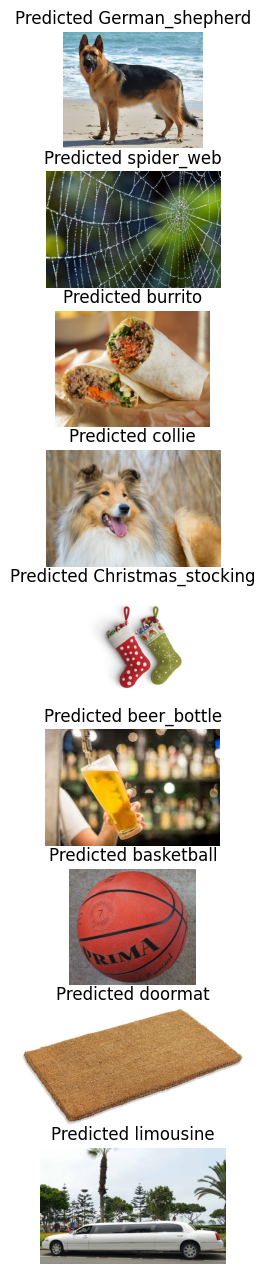

In [11]:
fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **Inception V3**

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

model = InceptionV3(weights='imagenet')
model.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

1/1 [==============================] - 3s 3s/step
[('n02106662', 'German_shepherd', 0.8766054), ('n03803284', 'muzzle', 0.023960717), ('n02091467', 'Norwegian_elkhound', 0.001706238)]
1/1 [==============================] - 0s 43ms/step
[('n04275548', 'spider_web', 0.7573459), ('n01773797', 'garden_spider', 0.010266491), ('n04548362', 'wallet', 0.0071124686)]
1/1 [==============================] - 0s 54ms/step
[('n07880968', 'burrito', 0.98714256), ('n07697313', 'cheeseburger', 0.0003793498), ('n07583066', 'guacamole', 0.00025429195)]
1/1 [==============================] - 0s 44ms/step
[('n02105855', 'Shetland_sheepdog', 0.82687134), ('n02106030', 'collie', 0.13271263), ('n04501370', 'turnstile', 0.008462604)]
1/1 [==============================] - 0s 45ms/step
[('n03026506', 'Christmas_stocking', 0.9988937), ('n04254777', 'sock', 3.9116785e-05), ('n02028035', 'redshank', 3.3237742e-05)]
1/1 [==============================] - 0s 54ms/step
[('n02823750', 'beer_glass', 0.2061406), ('n0761

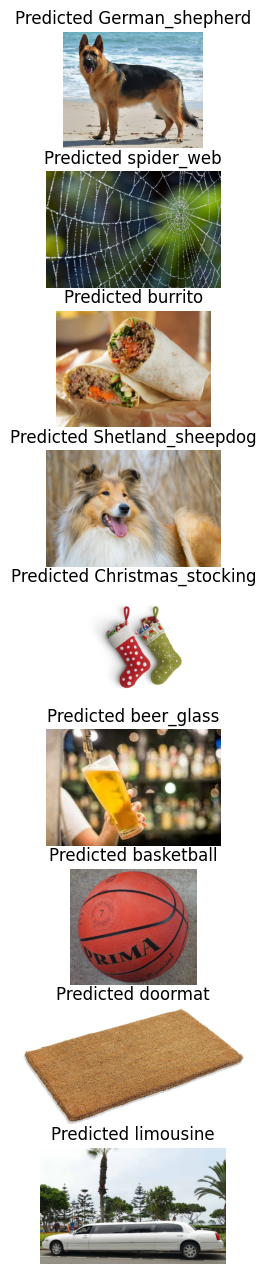

In [14]:
fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(299,299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **MobileNet**

In [15]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

1/1 [==============================] - 2s 2s/step
[('n02106662', 'German_shepherd', 0.9593247), ('n02115641', 'dingo', 0.0023736008), ('n02105162', 'malinois', 0.0022563618)]
1/1 [==============================] - 0s 27ms/step
[('n04275548', 'spider_web', 0.77539974), ('n01773797', 'garden_spider', 0.04064544), ('n01773549', 'barn_spider', 0.038877547)]
1/1 [==============================] - 0s 38ms/step
[('n07880968', 'burrito', 0.9276107), ('n07717556', 'butternut_squash', 0.01587576), ('n07697537', 'hotdog', 0.008509782)]
1/1 [==============================] - 0s 44ms/step
[('n02106030', 'collie', 0.8865847), ('n02105855', 'Shetland_sheepdog', 0.069085546), ('n02112137', 'chow', 0.0015462848)]
1/1 [==============================] - 0s 36ms/step
[('n03026506', 'Christmas_stocking', 0.81324273), ('n04026417', 'purse', 0.044436097), ('n04254777', 'sock', 0.017910974)]
1/1 [==============================] - 0s 36ms/step
[('n03888605', 'parallel_bars', 0.13551457), ('n02823428', 'beer_bo

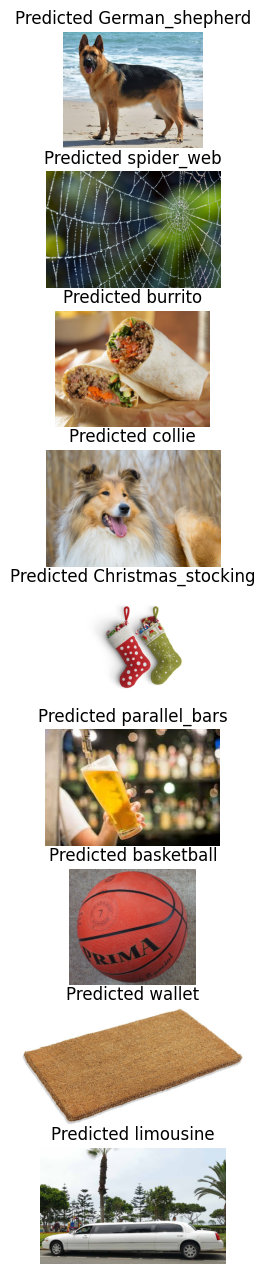

In [16]:
fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **DenseNet201**

In [17]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np

model = DenseNet201(weights='imagenet')
model.summary()

82524592/82524592 [==============================] - 1s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_5[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

1/1 [==============================] - 6s 6s/step
[('n02106662', 'German_shepherd', 0.96632487), ('n02115641', 'dingo', 0.0035318655), ('n02105162', 'malinois', 0.0026068322)]
1/1 [==============================] - 0s 63ms/step
[('n04275548', 'spider_web', 0.9788881), ('n01773797', 'garden_spider', 0.009407125), ('n01773157', 'black_and_gold_garden_spider', 0.005636812)]
1/1 [==============================] - 0s 61ms/step
[('n07880968', 'burrito', 0.99977976), ('n07875152', 'potpie', 8.77321e-05), ('n07871810', 'meat_loaf', 3.202141e-05)]
1/1 [==============================] - 0s 39ms/step
[('n02106030', 'collie', 0.6973628), ('n02105855', 'Shetland_sheepdog', 0.28618237), ('n02129165', 'lion', 0.0059806546)]
1/1 [==============================] - 0s 43ms/step
[('n03026506', 'Christmas_stocking', 0.99995494), ('n04254777', 'sock', 3.652731e-05), ('n03908618', 'pencil_box', 4.7433023e-06)]
1/1 [==============================] - 0s 39ms/step
[('n07615774', 'ice_lolly', 0.45198256), ('n02

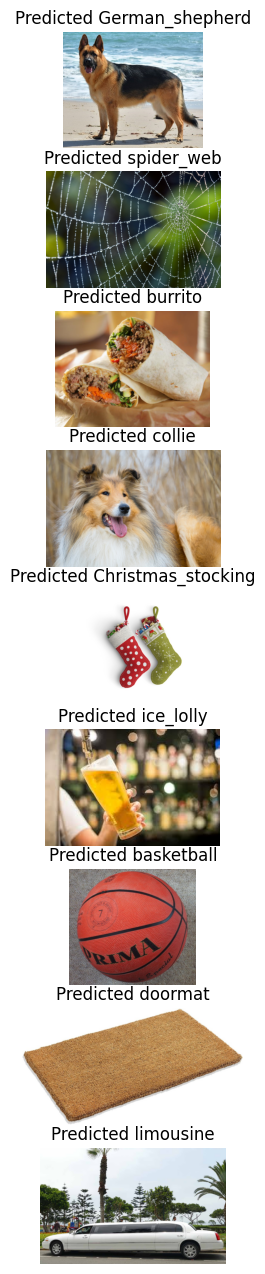

In [18]:
fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **Mobile NASNet**

In [1]:
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
import numpy as np

model = NASNetMobile(weights='imagenet')
model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 111, 111, 32  128         ['stem_conv1[0][0]']             
                                )                                                            

1/1 [==============================] - 7s 7s/step
[('n02106662', 'German_shepherd', 0.9477187), ('n02105162', 'malinois', 0.0018221133), ('n03803284', 'muzzle', 0.0010249866)]
1/1 [==============================] - 0s 45ms/step
[('n04275548', 'spider_web', 0.8747405), ('n01773549', 'barn_spider', 0.018139852), ('n01773797', 'garden_spider', 0.010967424)]
1/1 [==============================] - 0s 44ms/step
[('n07880968', 'burrito', 0.95520025), ('n07583066', 'guacamole', 0.002172782), ('n07873807', 'pizza', 0.0006251528)]
1/1 [==============================] - 0s 46ms/step
[('n02106030', 'collie', 0.74450815), ('n02105855', 'Shetland_sheepdog', 0.1870397), ('n01735189', 'garter_snake', 0.0008712541)]
1/1 [==============================] - 0s 49ms/step
[('n03026506', 'Christmas_stocking', 0.94843125), ('n03775071', 'mitten', 0.002226052), ('n02786058', 'Band_Aid', 0.0009921503)]
1/1 [==============================] - 0s 48ms/step
[('n04270147', 'spatula', 0.07396557), ('n03983396', 'pop_

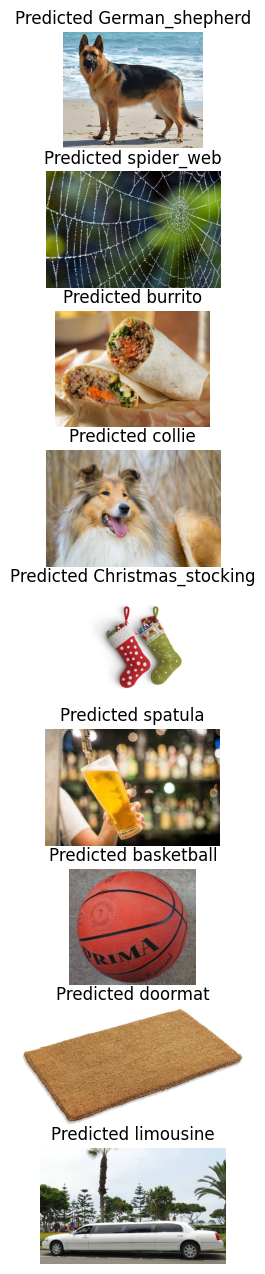

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **EfficientNet B7**

In [7]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np

model = EfficientNetB7(weights='imagenet')
model.summary()

268326632/268326632 [==============================] - 2s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 600, 600, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 600, 600, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Resc

1/1 [==============================] - 9s 9s/step
[('n02106662', 'German_shepherd', 0.761189), ('n02105162', 'malinois', 0.002567432), ('n03803284', 'muzzle', 0.0017310425)]
1/1 [==============================] - 0s 64ms/step
[('n04275548', 'spider_web', 0.7857678), ('n01773549', 'barn_spider', 0.019237034), ('n01773797', 'garden_spider', 0.008757847)]
1/1 [==============================] - 0s 73ms/step
[('n07880968', 'burrito', 0.8131528), ('n07583066', 'guacamole', 0.0021762683), ('n07875152', 'potpie', 0.0016002922)]
1/1 [==============================] - 0s 70ms/step
[('n02106030', 'collie', 0.6698268), ('n02105855', 'Shetland_sheepdog', 0.10821695), ('n02105251', 'briard', 0.0020339217)]
1/1 [==============================] - 0s 62ms/step
[('n03026506', 'Christmas_stocking', 0.8466168), ('n03775071', 'mitten', 0.0024963089), ('n04254777', 'sock', 0.0020363322)]
1/1 [==============================] - 0s 64ms/step
[('n02823750', 'beer_glass', 0.7418086), ('n02815834', 'beaker', 0.01

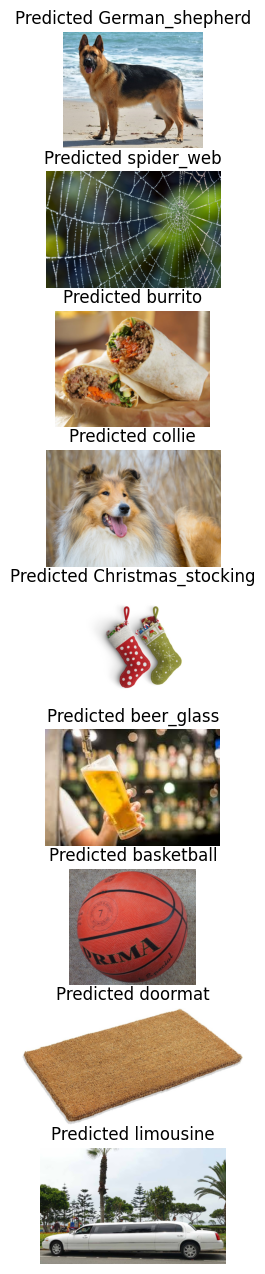

In [9]:
fig = plt.figure(figsize=(16,16))

for (i, file) in enumerate(file_names):

  img = image.load_img(mypath+file, target_size=(600,600))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  img2 = cv2.imread(mypath+file)

  preds = model.predict(x)
  predictions = decode_predictions(preds, top=3)[0]
  print(predictions)

  sub = fig.add_subplot(len(file_names), 1, i+1)
  sub.set_title(f'Predicted {str(predictions[0][1])}')
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()